Problématique : Reconnaître l'âge des individus via une photo - Cas d'usage: Les normes du web sont soumises à de nouvelles restrictions en Europe, notamment l'accès à certain site, tel que les jeux d'argent. Via un système de reconnaissance faciale, il est tout à fait possible de créer de nouveau système d'authentification basée sur l'âge pour mieux contrôler les utilisateurs.

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book

     |████████████████████████████████| 720 kB 7.5 MB/s 
     |████████████████████████████████| 189 kB 63.5 MB/s 
     |████████████████████████████████| 48 kB 4.4 MB/s 
     |████████████████████████████████| 1.2 MB 42.0 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 51 kB 329 kB/s 
     |████████████████████████████████| 561 kB 56.1 MB/s 
     |████████████████████████████████| 130 kB 57.2 MB/s 


<function fastbook.setup_book>

In [ ]:
#hide
from fastbook import *

In [ ]:
%reload_ext autoreload 
%autoreload 2 
%matplotlib inline

In [ ]:
print(fastbook.__version__)

0.0.18


In [ ]:
!pwd

/content


In [ ]:
!ls drive/MyDrive/10-50

010  014  018  022  026  030  034  038	042  046  050
011  015  019  023  027  031  035  039	043  047  export.pkl
012  016  020  024  028  032  036  040	044  048  models
013  017  021  025  029  033  037  041	045  049


In [ ]:
from google.colab import drive 
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = Path("drive/MyDrive")

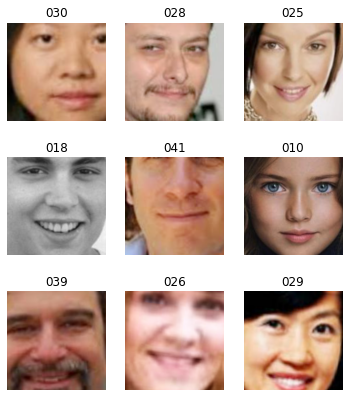

In [ ]:
# Utilisation avec ImageDataLoaders

##Définie la taille du sample (200 ici)
# np.random.seed(200)
## Utilisation de la class " image Data Loaders" 
# data = ImageDataLoaders.from_folder(path/"10-50",
#                                     valid_pct=0.2,
#                                     bs=64,
#                                     item_tfms=RandomResizedCrop(460,min_scale=0.75,ratio=(1.,1.)),
#                                     batch_tfms=[*aug_transforms(size=256,max_warp=0),Normalize.from_stats(*imagenet_stats)])
## Path = Chemin d'accès au dossier 
## Valid_pct = % utilisé pour le train vs la validation 
# data.show_batch(nrows=3, figsize=(7,8))

##Utilisation avec DataBlock 
np.random.seed(400)
item_tfms= RandomResizedCrop(460,min_scale=0.5,ratio=(1.,1.)) 
batch_tfms = [*aug_transforms(size=256,max_warp=0),Normalize.from_stats(*imagenet_stats)]
bs=64
pattern = r'([0-9]{3})\/'
face_age = DataBlock(blocks=(ImageBlock,CategoryBlock),
                     get_items=get_image_files,
                     splitter=RandomSplitter(),
                     get_y=RegexLabeller(pat= pattern),
                     item_tfms=item_tfms,
                     batch_tfms=batch_tfms,)
path_im = path/'10-50'
dls = face_age.dataloaders(path_im,bs=bs) 
dls.show_batch(max_n=9,figsize=(6,7)) 



In [ ]:
dls.vocab.o2i

{'010': 0,
 '011': 1,
 '012': 2,
 '013': 3,
 '014': 4,
 '015': 5,
 '016': 6,
 '017': 7,
 '018': 8,
 '019': 9,
 '020': 10,
 '021': 11,
 '022': 12,
 '023': 13,
 '024': 14,
 '025': 15,
 '026': 16,
 '027': 17,
 '028': 18,
 '029': 19,
 '030': 20,
 '031': 21,
 '032': 22,
 '033': 23,
 '034': 24,
 '035': 25,
 '036': 26,
 '037': 27,
 '038': 28,
 '039': 29,
 '040': 30,
 '041': 31,
 '042': 32,
 '043': 33,
 '044': 34,
 '045': 35,
 '046': 36,
 '047': 37,
 '048': 38,
 '049': 39,
 '050': 40}

In [ ]:
learn = cnn_learner(dls,resnet34,metrics=[error_rate,accuracy]).to_fp16()
learn.fit_one_cycle(4)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn) 
losses,idxs= interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs) 

True

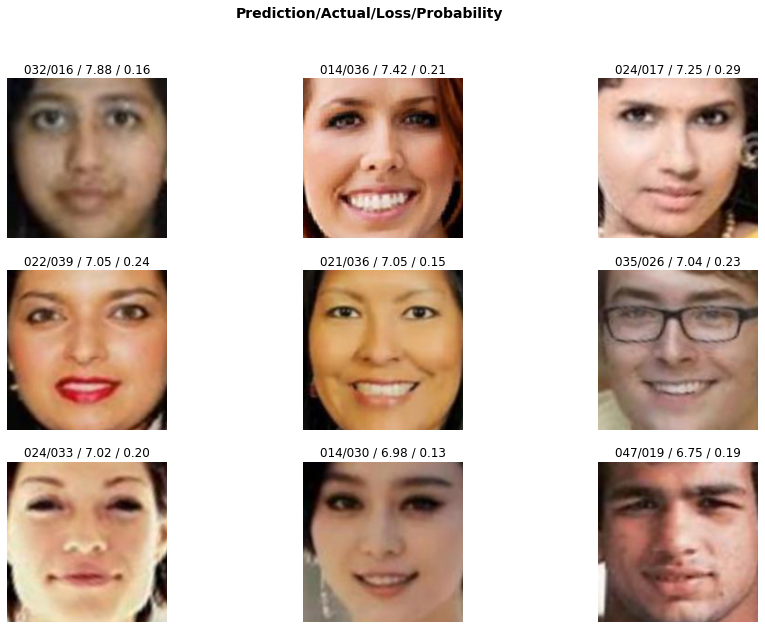

In [ ]:
interp.plot_top_losses(9,figsize=(15,10))

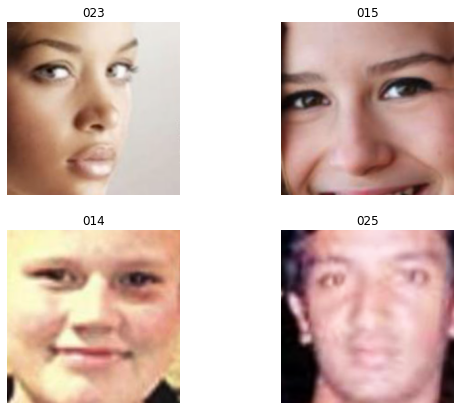

In [ ]:
dls.train.show_batch(max_n=4,figsize=(9,7))

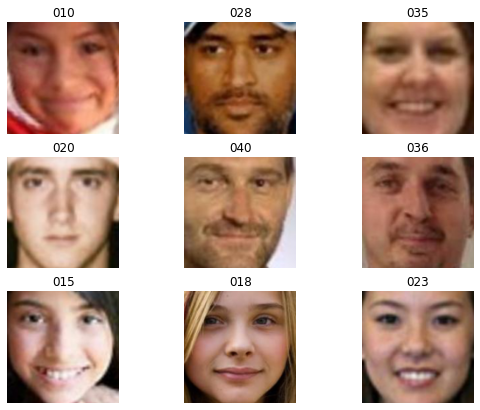

In [ ]:
dblock2 = face_age.new(item_tfms=RandomResizedCrop(size=128,min_scale=0.2))
dls = dblock2.dataloaders(path_im,bs=bs)
dls.valid.show_batch(max_n=9,figsize=(9,7))

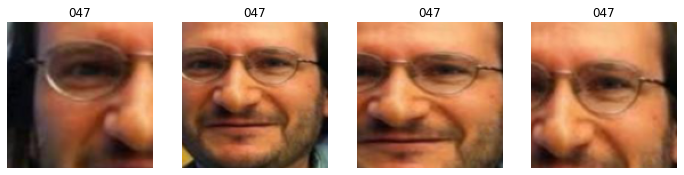

In [ ]:
dls.train.show_batch(max_n=4,nrows=1, unique=True)

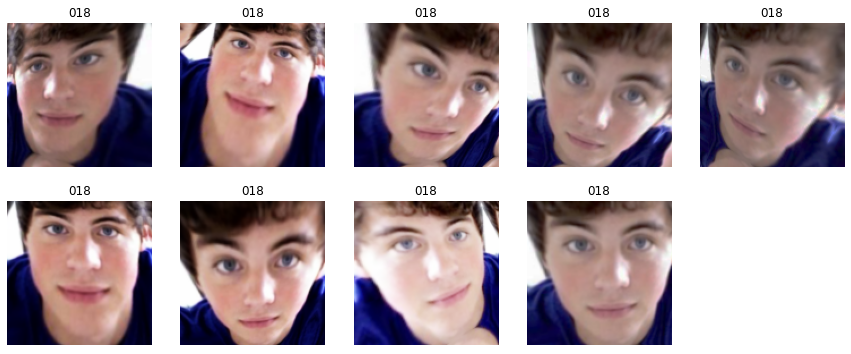

In [ ]:
dblock2 = face_age.new(item_tfms=Resize(128),batch_tfms=aug_transforms(mult=2))
dls = dblock2.dataloaders(path_im,bs=bs)
dls.train.show_batch(max_n=9,nrows=2,unique=true)

In [ ]:
#Train part  
dblock = face_age.new(
    item_tfms=RandomResizedCrop(224,min_scale=0.5),
    batch_tfms=aug_transforms(mult=2.0,min_scale=2.0,size=200)
)
dls= dblock.dataloaders(path_im,bs=bs)

In [ ]:
learn = cnn_learner(dls,resnet18,metrics=[error_rate,accuracy])
learn.fine_tune(10)

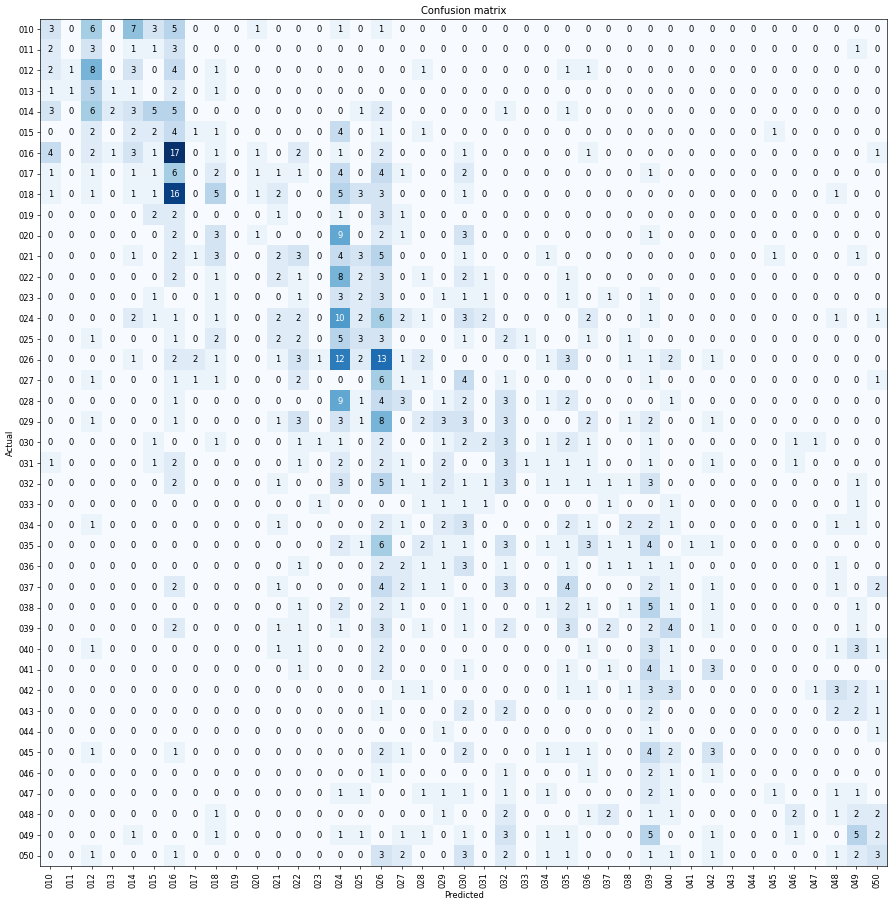

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(15,15),dpi=60)

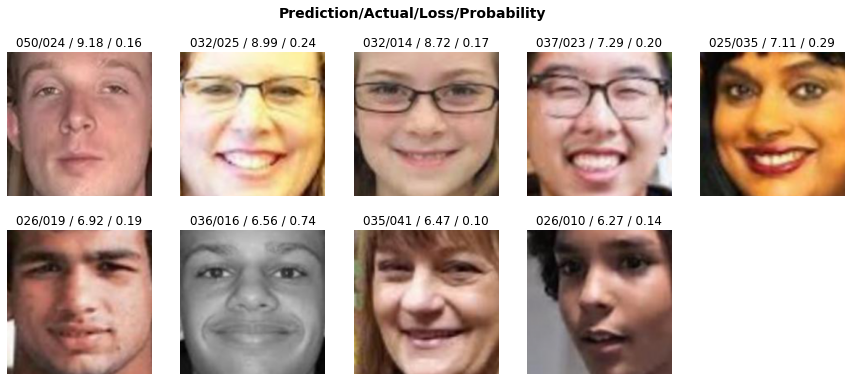

In [ ]:
interp.plot_top_losses(10,nrows=2)